<a href="https://colab.research.google.com/github/Rhize-Nizen/AI-ML/blob/main/Public_Transport_Ticket_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("delhi_metro_updated.csv")
df

/tmp/ipython-input-3062439574.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("delhi_metro_updated.csv")


,TripID,Date,From_Station,To_Station,Distance_km,Fare,Cost_per_passenger,Passengers,Ticket_Type,Remarks
0,59771,2022-05-08,Inderlok,Kashmere Gate,12.94,77.99,18.27,13.0,Smart Card,maintenance
1,21363,2023-01-12,Model Town,Dilshad Garden,2.33,35.89,83.71,15.0,Tourist Card,maintenance
2,127325,2023-07-13,Kashmere Gate,Netaji Subhash Place,5.56,64.35,43.70,9.0,Single,off-peak
3,140510,2022-11-10,Chandni Chowk,Hauz Khas,4.02,144.13,14.98,27.0,NaN,maintenance
4,144298,2022-11-06,Rajiv Chowk,Kalkaji Mandir,9.66,104.96,83.84,23.0,Single,off-peak
...,...,...,...,...,...,...,...,...,...,...
174294,119880,2022-04-04,KIRTI NAGAR,AIIMS,5.13,100.48,20.33,28.0,Tourist Card,peak
174295,103695,2023-10-25,Model Town,Inderlok,0.64,86.31,111.27,21.0,Tourist Card,off-peak
174296,131933,2023-02-14,Noida City Centre,Shivaji Park,4.86,140.81,55.83,18.0,Smart Card,festival
174297,146868,2024-08-06,Barakhamba Road,Pragati Maidan,12.31,149.82,65.96,18.0,Single,weekend


In [ ]:
df =df.copy()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
start_date = "2023-01-01"
end_date = "2023-01-31"

df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]


In [ ]:
df['Route'] = df['From_Station'] + " → " + df['To_Station']


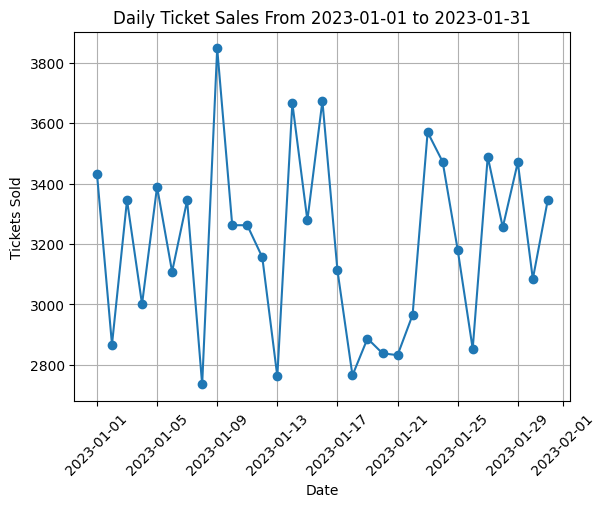

In [ ]:
df['Passengers'] = pd.to_numeric(df['Passengers'], errors='coerce')
df['Passengers'] = df['Passengers'].fillna(0)
daily_sales = df.groupby('Date')['Passengers'].sum()

plt.figure()
plt.plot(daily_sales, marker='o')
plt.xlabel("Date")
plt.ylabel("Tickets Sold")
plt.title("Daily Ticket Sales From "+ start_date+" to "+ end_date)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
ticket_stats = df['Passengers'].describe()
ticket_stats


,Passengers
count,5002.000000
mean,19.841863
std,4.978938
min,0.000000
25%,17.000000
50%,20.000000
75%,23.000000
max,38.000000


In [ ]:
route_stat_report = (
    df.groupby('Route')['Passengers']
    .agg(['sum', 'mean', 'max', 'min'])
    .reset_index()
)

route_stat_report.columns = [
    'Route',
    'Total_Tickets',
    'Average_Tickets',
    'Maximum_Tickets',
    'Minimum_Tickets'
]

route_stat_report


,Route,Total_Tickets,Average_Tickets,Maximum_Tickets,Minimum_Tickets
0,AIIMS → Dilshad Garden,25.0,25.000000,25.0,25.0
1,AIIMS → Kirti Nagar,19.0,19.000000,19.0,19.0
2,AIIMS → Netaji Subhash Place,25.0,25.000000,25.0,25.0
3,AIIMS → Barakhamba Road,23.0,23.000000,23.0,23.0
4,AIIMS → Central Secretariat,22.0,22.000000,22.0,22.0
...,...,...,...,...,...
1534,Shivaji Park → Noida City Centre,70.0,23.333333,33.0,13.0
1535,Shivaji Park → Old Delhi,80.0,16.000000,22.0,12.0
1536,Shivaji Park → Pragati Maidan,17.0,17.000000,17.0,17.0
1537,Shivaji Park → Punjabi Bagh,70.0,17.500000,20.0,12.0


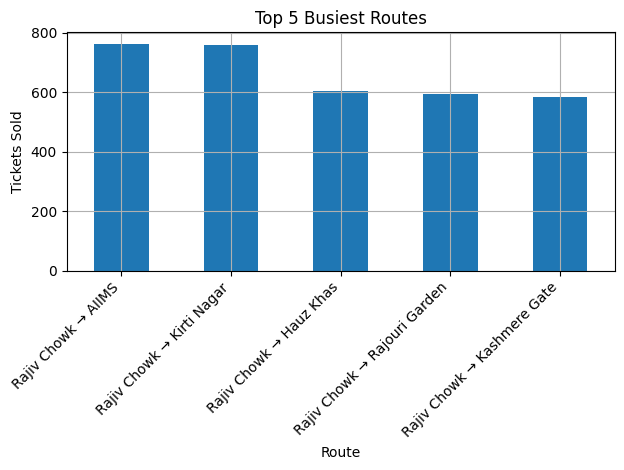

In [ ]:
top_routes_sales = (
    df.groupby('Route')['Passengers']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

plt.figure()
top_routes_sales.plot(kind='bar')
plt.xlabel("Route")
plt.ylabel("Tickets Sold")
plt.title("Top 5 Busiest Routes")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='x')
plt.grid(axis='y')
plt.tight_layout()

plt.show()


In [ ]:
print("Total Tickets Sold:", df['Passengers'].sum())


Total Tickets Sold: 99249.0


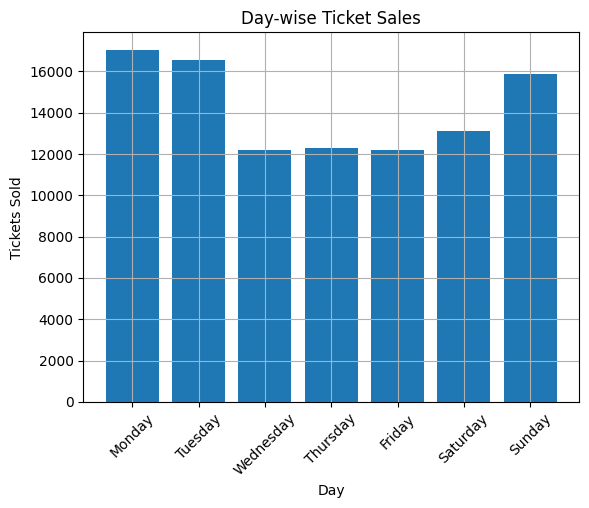

In [ ]:
df['Day'] = df['Date'].dt.day_name()

daywise_sales = df.groupby('Day')['Passengers'].sum()
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daywise_sales = daywise_sales.reindex(order)

plt.figure()
plt.bar(daywise_sales.index, daywise_sales.values)
plt.xlabel("Day")
plt.ylabel("Tickets Sold")
plt.title("Day-wise Ticket Sales")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.grid(axis='x')
plt.show()

